# Assignment 4 - Classifiers

## Student Details

**`Name`** Montgomery Gole, Viral Bankimbhai Thakar

**`Email`** mgole@torontomu.ca, vthakar@torontomu.ca

**`Student ID`** 501156495, 501213983

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Question 1

### Implementation of AND Function

An AND function or AND gate receives two inputs $(x_1, x_2)$ and returns an output as following table:
    
| $x_1$ | $x_2$ | $out$ |
| - | - | --- |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

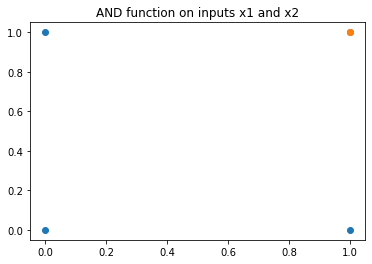

In [3]:
# Visualizing the AND function. 
x1 = [1,1,0,0] 
x2 = [1,0,1,0]
plt.scatter(x1, x2)
plt.scatter([x1[0]],[x2[0]])
plt.title("AND function on inputs x1 and x2")
plt.show()

At first let's try to understand the requirements for the neural network model and solve the problem without explicit programming or code.

Let's consider a `heavside step function` $H(x)$ such that 

$$
        H(x) = \begin{cases}
                        0, & \text{if } x < c \\
                        1, & \text{if } x \geq c
                \end{cases}
$$

If we let $c = 0.5$, we can begin to see how this activation function can allow single neuron (perceptron) to estimate the AND function of two inputs.

Let's consider our AND function as, 
$$f(x_1, x_2) = H(w_1*x_1 + w_2*x_2 + b, 0.5)$$ 
where,
- $w_1*x_1 + w_2*x_2 + b$ indicates the weighted linear combination of inputs $x_1$ and $x_2$.
- $x_1$ and $x_2$ indicates the inputs.
- $w_1$ and $w_2$ are the weights associated with each inputs.
- $b$ is a bias tear.
- $H(\cdot)$ is activation function or heiavside step function. 

If we solve for $w_1$, $w_2$, and $b$ with respect to the following ... 

$$  
                1 = H(w_1*1 + w_2*1 + b, 0.5) \\
                0 = H(w_1*0 + w_2*1 + b, 0.5) \\
                0 = H(w_1*1 + w_2*0 + b, 0.5) \\
                0 = H(w_1*0 + w_2*0 + b, 0.5) \\
$$

Then simplifying above equations ...
$$
    1 = H(w_1 + w_2 + b, 0.5) \\
    0 = H(w_2 + b, 0.5) \\
    0 = H(w_1 + b, 0.5) \\
    0 = H(b, 0.5)
$$

It is clear that a solution to the system of equations has $w_1 = 0.25$, $w_2 = 0.25$, and $b < 0.25$. Also, it is clear that only a single neuron is necessary to create an AND gate. Let's create a simple AND function using these findings.

In [4]:
def step_fn(out, c):
    return 0 if out < c else 1

def and_fn(x1, x2):
    y = (0.25*x1) + (0.25*x2)
    return step_fn(y, 0.5)
    
X = [[1,1], [1,0], [0,1], [0,0]] 
y = [1, 0, 0, 0]
for inp in X:
    print(f"{inp[0]} AND {inp[1]} = {and_fn(inp[0], inp[1])}")

1 AND 1 = 1
1 AND 0 = 0
0 AND 1 = 0
0 AND 0 = 0


Now let's see whether our neural network can learn the same set of parameters or not!!

A perceptron is a linear function that finds some hyperplane to separate data into two classes.

In this case *hyperplane* is referring to the linear boundary which splits data into two categories represented by the line orthagonal to $t = x_1*w_1 + x_2*w_2 + b$ where $t$ is the threshold for the step function.

In [5]:
# Define the input data and expected output for the AND function
input_data = tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=tf.float32)
expected_output = tf.constant([[0], [0], [0], [1]], dtype=tf.float32)

# Define the neural network architecture
input_layer = tf.keras.layers.Input(shape=(2,))
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name="perceptron")(input_layer)
# output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer)

# Define the model using the input and output layers
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model with binary cross-entropy loss and Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model for 500 epochs
model.fit(input_data, expected_output, epochs=500, verbose=0)

Let's test our model by predicting for different inputs ...

In [6]:
for i in range(len(input_data)):
    input_point = input_data[i]
    expected_output_point = expected_output[i]
    predicted_output_point = model.predict(tf.reshape(input_point, (1, 2)), verbose=0).round()
    print(f"Input point: {input_point}, Expected output point: {expected_output_point}, Predicted output point: {predicted_output_point}")

Input point: [0. 0.], Expected output point: [0.], Predicted output point: [[0.]]
Input point: [0. 1.], Expected output point: [0.], Predicted output point: [[0.]]
Input point: [1. 0.], Expected output point: [0.], Predicted output point: [[0.]]
Input point: [1. 1.], Expected output point: [1.], Predicted output point: [[1.]]


Let's check the weights of our model ...

In [7]:
weights = model.layers[1].get_weights()[0]
print(weights)

[[1.8726175]
 [1.8589239]]


In [8]:
biases = model.layers[1].get_weights()[1]
print(biases)

[-2.89759]


As we can see that our model's weights and bias tearms are aligning with our manual calculation of weights and biases. 

### Implementation of OR Function

We will directly try our Neural Network model for OR function. 

An OR function or AND gate receives two inputs $(x_1, x_2)$ and returns an output as following table:
    
| $x_1$ | $x_2$ | $out$ |
| - | - | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

In [9]:
# Define the input data and expected output for the OR function
input_data = tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=tf.float32)
expected_output = tf.constant([[0], [1], [1], [1]], dtype=tf.float32)

# Define the neural network architecture with a single neuron and the sigmoid activation function
input_layer = tf.keras.layers.Input(shape=(2,))
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name="perceptron")(input_layer)

# Define the model using the input and output layers
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model with binary cross-entropy loss and Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model for 500 epochs
model.fit(input_data, expected_output, epochs=500, verbose=0)

Let's test our model by predicting for different inputs ...

In [10]:
for i in range(len(input_data)):
    input_point = input_data[i]
    expected_output_point = expected_output[i]
    predicted_output_point = model.predict(tf.reshape(input_point, (1, 2)), verbose=0).round()
    print(f"Input point: {input_point}, Expected output point: {expected_output_point}, Predicted output point: {predicted_output_point}")

Input point: [0. 0.], Expected output point: [0.], Predicted output point: [[0.]]
Input point: [0. 1.], Expected output point: [1.], Predicted output point: [[1.]]
Input point: [1. 0.], Expected output point: [1.], Predicted output point: [[1.]]
Input point: [1. 1.], Expected output point: [1.], Predicted output point: [[1.]]


Let's check the weights of our model ...

In [11]:
weights = model.layers[1].get_weights()[0]
print(weights)

[[1.5497346]
 [1.7687374]]


In [12]:
biases = model.layers[1].get_weights()[1]
print(biases)

[-0.02915679]


## Question 2

### 1. In SVM what is the meaning of margin? Which are the equations of the two margin hyperplanes H+ and H-?

As we have mentioned in the first question, the perceptron finds a hyperplane which separates the two classes in the AND/OR function. 

However, there are infinite hyperplanes which could separate the two classes. `The objective of support vector machine (SVM) is to find which of these hyperplanes is optimal.` This hyperplane is also called `decision boundry`.

SVM aims to find the hyperplane or decision boundary such that the distance between the decision boundary (or hyperplane) and the closest data points from either classes is maximum.

SVM uses the term `"margin"` to describe the distance between the decision boundary (or hyperplane) and the closest data points for each class. The classifier can generalize to unseen data more effectively as the margin gets larger. The decision boundary is determined by these closest data points, which are called support vectors.

There are two margin hyperplanes in SVM: the positive margin hyperplane (H+) and the negative margin hyperplane (H-). The positive margin hyperplane (H+) is the hyperplane that is parallel to the decision boundary and passes through the closest positive support vector. Similarly, the negative margin hyperplane (H-) is the hyperplane that is parallel to the decision boundary and passes through the closest negative support vector.

The equations of the two margin hyperplanes can be derived as follows:

$$
    H+ : w * x + b = 1 \\
    H- : w * x + b = -1
$$
where 
- $w$ is the weight vector
- $x$ is the input vector
- $b$ is the bias term 

### 2. Consider the three linearly separable two-dimensional input vectors in the following figure. Find the linear SVM that optimally separates the classes by maximizing the margin.

<!-- ![image info](./data/q2-2-image.png) -->

In [13]:
X = np.array([[0.5, 1], [1, 0.5], [1, 1.5]])
y = np.array([-1, -1, 1])
clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(X, y) 

print('w : ',clf.coef_)
print('b : ',clf.intercept_)
print('Support Vectors : ', clf.support_vectors_)
print('Coefficients of the support vector : ', clf.dual_coef_)

w :  [[1.99804688 2.        ]]
b :  [-3.9983724]
Support Vectors :  [[0.5 1. ]
 [1.  0.5]
 [1.  1.5]]
Coefficients of the support vector :  [[-3.99609375e+00 -1.95312500e-03  3.99804688e+00]]


### 3. What is Kernel Function 

In machine learning, a kernel function is a mathematical function that takes two input vectors in their original feature space and calculates the dot product of these vectors in a transformed feature space. This allows the algorithm to implicitly map the original input data into a higher-dimensional feature space where it is easier to classify using linear algorithms.

Kernel functions are commonly used in kernel methods, such as support vector machines (SVMs), to perform nonlinear classification, regression, and other machine learning tasks. By applying a kernel function, SVMs can learn nonlinear decision boundaries in the transformed feature space without having to explicitly compute the mapping to the higher-dimensional space.

There are several types of kernel functions, such as linear, polynomial, radial basis function (RBF), and sigmoid, each with its own set of hyperparameters. The choice of kernel function depends on the nature of the data and the task at hand. The RBF kernel is a popular choice due to its ability to capture complex nonlinear relationships between the data points, while the linear kernel is useful when the data is already separable in the original feature space.

## Question 3

### Compare Neural Network and SVM in Classification of heart disease data set in R or Python language.

**SOME OF OUR CODE PIECES ARE SAME AS OUR ASSIGNMENT 2 SOLUTION TO AVOID DUPLICATE CODE**

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from utils import styled_print, download_data, read_and_clean_data, \
     plot_box_plot_hist_plot, plot_count_plot, discrete_to_target_plot, \
     continuous_to_target_plot, correlation_analysis, traditional_feature_importance

In [15]:
cleveland_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [16]:
headers = {
    0: "age",
    1: "sex",
    2: "cp",
    3: "trestbps",
    4: "chol",
    5: "fbs",
    6: "restecg",
    7: "thalach",
    8: "exang",
    9: "oldpeak",
    10: "slope",
    11: "ca",
    12: "thal",
    13: "target"
}

In [17]:
styled_print(f"Heart Disease Data Analysis", header=True)
styled_print(f"Extracting Data From {cleveland_url}")
cleveland_file = download_data(cleveland_url, path_to_download="./data")
cleveland_df = read_and_clean_data(cleveland_file, header=headers.values())

› Heart Disease Data Analysis
    Extracting Data From http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data


In [18]:
styled_print(f"Cleveland Dataframe Info", header=True)
cleveland_df.info()

› Cleveland Dataframe Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


#### Dataset Understanding and Observations

Here are some observations from the `heart-disease.names` file regarding the features.

1. `age` is a `continuous` feature which indicates the age of the person in years. 
2. `sex` is a `binary categorical` feature indicating sex information.
    - 1 : male
    - 0 : female
3. `cp` is a `categorical` feature which indicates the type of chest pain.
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. `trestbps` is a `continuous` feature indicating resting blood pressure (in mm Hg on admission to the hospital).
5. `chol` is a `continuous` feature indicating serum cholestoral in mg/dl.
6. `fbs` is a `binary categorical` feature indicating fasting blood sugar > 120 mg/dl.
    - 1 : true
    - 0 : false
7. `restecg` is a `categorical` feature indicating resting electrocardiographic results.
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. `thalach` is a `continuous` feature indicating maximum heart rate achieved.
9. `exang` is a `binary categorical` feature indicating exercise induced angina.
    - 1 : yes
    - 0 : no
10. `oldpeak` is a `continuos` feature indicating ST depression induced by exercise relative to rest.
11. `slope` is a `categorical`feature indicating the slope of the peak exercise ST segment.
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. `ca` is a `categorical` feature indicating number of major vessels (0-3) colored by flourosopy.
13. `thal` is a `categorical` feature.
    - 3 : normal
    - 6 : fixed defect
    - 7 : reversable defect
14. `target` is a `categorical` feature (target) indicating the diagnosis of heart disease (angiographic disease status)

**Two main observations:** 
1. As all of over categorical features are already numerically encoded we will treat them as discrete feature and not traditional categorical features. 
2. As provided in `heart-disease.names` file:

    ```The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).```

    So Initially We can convert the `target` into two categories 
    - 0: Absence of Heart disease
    - 1: Presence of Heart disease (Combine current categories 1, 2, 3, and 4)

In [19]:
categorical_columns = ["cp", "restecg", "slope", "thal", "ca"]
binary_columns = ["sex", "fbs", "exang"]

continuous_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
discrete_columns = categorical_columns + binary_columns
target_column = ["target"]

In [20]:
# Creating Copy of Dataframe for Data Processing
data_df = cleveland_df.copy()

#### Data Preprocessing and Exploratory Data Analysis

##### Preprocessing Target

In [21]:
# Check unique values for target and its percentage
data_df["target"].value_counts(dropna=False)

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [22]:
# Mapping target 2, 3, and 4 to 1. 
target_mapping = {2: 1, 3: 1, 4: 1}
data_df["target"] = data_df["target"].apply(lambda x: 1 if x == 2 or x == 3 or x == 4 else x)

In [23]:
# Check unique values for target and its percentage
data_df["target"].value_counts(dropna=False)

0    164
1    139
Name: target, dtype: int64

##### Splitting The Data

To split the data we are using `train_test_split()` method from `sklearn's` `model_selection` module. The splitting is based on the following parameters:
1. `test_size` is set to `0.2`. It will makes sure that we have 20% of our data for testing and rest 80% of data we can use for training and/or cross-validation.
2. `random_state` is set to `10`. We can set it to any fix number as it will help us in reproducibility of our experiment.
3. `stratify` is set to `target` feature. This will ensure the stratified sampling process. In simple words it will make sure that the distribution of Heart Disease and Non-Heart Disease patient remains as it is even after the split. Refer [this](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators-with-stratification-based-on-class-labels) for further details. 
4. `shuffle` is set to `True`.

In [24]:
train_df, test_df = train_test_split(data_df, test_size=.2, random_state=10, stratify=data_df["target"], shuffle=True)

Let's check how stratify sampling make sure that the distribution of data is balance after the split too. 

In [25]:
# Check unique values for target and its percentage
data_df["target"].value_counts(normalize=True)*100

0    54.125413
1    45.874587
Name: target, dtype: float64

In [26]:
# Check unique values for target and its percentage
train_df["target"].value_counts(normalize=True)*100

0    54.132231
1    45.867769
Name: target, dtype: float64

In [27]:
# Check unique values for target and its percentage
test_df["target"].value_counts(normalize=True)*100

0    54.098361
1    45.901639
Name: target, dtype: float64

As we can see that in both training and testing dataset, `54%` of data comes from the `label 0` i.e. Absence of Heart Disease while `46%` of data comes from the `label 1` i.e. Presence of Heart Disease. **These percentages matches the percentage distribution in original dataset.**

In [28]:
styled_print(f"There are {train_df.shape[0]} data points for training and {test_df.shape[0]} data points for testing.", header=True)

› There are 242 data points for training and 61 data points for testing.


**Why are we splitting data first before any exploratory data analysis or even treating missing values??**

Our reasoning to split the data at the very beginning of workflow is to make sure that we can ensure that there is no data leak issues.
For example, we usually use median value to replace the missing values in a continuous feature. We want to make sure that the median value which we calculate comes only from the training set and we apply it to test set. This way we can gurantee that even in data preprocessing we are not introducing any direct or indirect data leak issues. 

This fact is usually ignored in many books and material but in practice it is heavily been used. 


##### Missing Value Treatment

In [29]:
train_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          3
thal        2
target      0
dtype: int64

In [30]:
test_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          1
thal        0
target      0
dtype: int64

As we have a very small number of missing values in the training and test dataset, it would be better to drop those rows instead of trying to figure out strategy to replace them. 

In [31]:
train_df = train_df.dropna()
test_df = test_df.dropna()

Let's verify that all the rows with missing values are dropped. 

In [32]:
train_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
test_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
styled_print(f"There are {train_df.shape[0]} data points for training and {test_df.shape[0]} data points for testing.")

    There are 237 data points for training and 60 data points for testing.


#### Model Creation

We will follow these steps to create the `BASELINE` model:
- Prepare the data for modeling.
    - Create X and Y - (x_train, y_train) and (x_test, y_test)
    - Scale Continuous Features using Min-Max Scaler.
    - Scale Discrete Features using Min-Max Scaler.
- Build the `BASELINE` model on the train data.
    - Create `Neural Network` Model
- Build the `Experiment` model on the train data.
    - Create `SVM` Model
- Test the model on the test set.
    - Calculate $MAE$ score to measure the performance of the model.
    - Calculate $Confusion \ Matrix$.
    - Calculate $Classification \ Report$ to get Precision, Recall and F1 Score.

##### Prepare the data for modeling

In [35]:
y_train = train_df[target_column[0]].copy()
x_train = train_df.drop(target_column[0], axis=1)

In [36]:
y_test = test_df[target_column[0]].copy()
x_test = test_df.drop(target_column[0], axis=1)

In [37]:
x_train_copy = x_train.copy(deep=True).reset_index(drop=True)
x_test_copy = x_test.copy(deep=True).reset_index(drop=True)

In [38]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

In [39]:
x_train_copy.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0
1,48.0,1.0,4.0,130.0,256.0,1.0,2.0,150.0,1.0,0.0,1.0,2.0,7.0
2,50.0,1.0,4.0,150.0,243.0,0.0,2.0,128.0,0.0,2.6,2.0,0.0,7.0
3,63.0,0.0,2.0,140.0,195.0,0.0,0.0,179.0,0.0,0.0,1.0,2.0,3.0
4,49.0,0.0,2.0,134.0,271.0,0.0,0.0,162.0,0.0,0.0,2.0,0.0,3.0
5,57.0,1.0,4.0,152.0,274.0,0.0,0.0,88.0,1.0,1.2,2.0,1.0,7.0
6,60.0,0.0,4.0,158.0,305.0,0.0,2.0,161.0,0.0,0.0,1.0,0.0,3.0
7,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0
8,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0
9,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0


In [40]:
x_train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,0.0,1.000000,0.528302,0.641553,0.0,1.0,0.633588,0.0,0.714286,0.5,1.000000,1.0
1,0.395833,1.0,1.000000,0.339623,0.296804,1.0,1.0,0.603053,1.0,0.000000,0.0,0.666667,1.0
2,0.437500,1.0,1.000000,0.528302,0.267123,0.0,1.0,0.435115,0.0,0.464286,0.5,0.000000,1.0
3,0.708333,0.0,0.333333,0.433962,0.157534,0.0,0.0,0.824427,0.0,0.000000,0.0,0.666667,0.0
4,0.416667,0.0,0.333333,0.377358,0.331050,0.0,0.0,0.694656,0.0,0.000000,0.5,0.000000,0.0
5,0.583333,1.0,1.000000,0.547170,0.337900,0.0,0.0,0.129771,1.0,0.214286,0.5,0.333333,1.0
6,0.645833,0.0,1.000000,0.603774,0.408676,0.0,1.0,0.687023,0.0,0.000000,0.0,0.000000,0.0
7,0.750000,0.0,0.666667,0.433962,0.664384,1.0,1.0,0.656489,0.0,0.142857,0.0,0.333333,0.0
8,0.291667,0.0,0.666667,0.264151,0.198630,0.0,0.0,0.717557,0.0,0.035714,0.5,0.000000,0.0
9,0.666667,1.0,1.000000,0.415094,0.091324,0.0,1.0,0.412214,1.0,0.642857,0.5,0.333333,0.0


In [41]:
x_test_copy.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,41.0,0.0,3.0,112.0,268.0,0.0,2.0,172.0,1.0,0.0,1.0,0.0,3.0
1,64.0,1.0,4.0,120.0,246.0,0.0,2.0,96.0,1.0,2.2,3.0,1.0,3.0
2,43.0,1.0,4.0,120.0,177.0,0.0,2.0,120.0,1.0,2.5,2.0,0.0,7.0
3,35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0
4,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0
5,54.0,1.0,3.0,125.0,273.0,0.0,2.0,152.0,0.0,0.5,3.0,1.0,3.0
6,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0
7,63.0,0.0,3.0,135.0,252.0,0.0,2.0,172.0,0.0,0.0,1.0,0.0,3.0
8,41.0,0.0,2.0,105.0,198.0,0.0,0.0,168.0,0.0,0.0,1.0,1.0,3.0
9,46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,0.0,7.0


In [42]:
x_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.250000,0.0,0.666667,0.169811,0.324201,0.0,1.0,0.770992,1.0,0.000000,0.0,0.000000,0.00
1,0.729167,1.0,1.000000,0.245283,0.273973,0.0,1.0,0.190840,1.0,0.392857,1.0,0.333333,0.00
2,0.291667,1.0,1.000000,0.245283,0.116438,0.0,1.0,0.374046,1.0,0.446429,0.5,0.000000,1.00
3,0.125000,1.0,1.000000,0.301887,0.356164,0.0,1.0,0.648855,1.0,0.000000,0.0,0.000000,1.00
4,0.562500,1.0,0.333333,0.339623,0.216895,0.0,1.0,0.702290,0.0,0.000000,0.0,0.000000,1.00
5,0.520833,1.0,0.666667,0.292453,0.335616,0.0,1.0,0.618321,0.0,0.089286,1.0,0.333333,0.00
6,0.604167,1.0,1.000000,0.188679,0.438356,0.0,0.5,0.526718,0.0,0.785714,1.0,1.000000,0.75
7,0.708333,0.0,0.666667,0.386792,0.287671,0.0,1.0,0.770992,0.0,0.000000,0.0,0.000000,0.00
8,0.250000,0.0,0.333333,0.103774,0.164384,0.0,0.0,0.740458,0.0,0.000000,0.0,0.333333,0.00
9,0.354167,1.0,1.000000,0.245283,0.280822,0.0,1.0,0.557252,0.0,0.142857,0.0,0.000000,1.00


##### Build the `Neural Network` model on the train data.

In [43]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[13]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
      'accuracy',
      tf.keras.metrics.Precision(),
      tf.keras.metrics.Recall()
    ]
)

# Train the model
history = model.fit(
    x_train, 
    y_train, 
    epochs=100, 
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

# Evaluate the model on the testing set
test_metrics = model.evaluate(x_test, y_test)

# Print the testing accuracy
styled_print("Test Performance ...", header=True)
styled_print(
    f"Loss: {test_metrics[0]}, Accuracy: {test_metrics[1]}, Precision: {test_metrics[2]}, Recall: {test_metrics[3]}")

Epoch 1/100
6/6 [==============================] - 2s 94ms/step - loss: 0.6833 - accuracy: 0.6296 - precision: 0.6607 - recall: 0.4205 - val_loss: 0.6635 - val_accuracy: 0.7500 - val_precision: 0.6800 - val_recall: 0.8095
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6436 - accuracy: 0.8148 - precision: 0.8272 - recall: 0.7614 - val_loss: 0.6346 - val_accuracy: 0.7708 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6057 - accuracy: 0.8254 - precision: 0.8161 - recall: 0.8068 - val_loss: 0.6026 - val_accuracy: 0.7500 - val_precision: 0.6552 - val_recall: 0.9048
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.5558 - accuracy: 0.8466 - precision: 0.8391 - recall: 0.8295 - val_loss: 0.5579 - val_accuracy: 0.7917 - val_precision: 0.7037 - val_recall: 0.9048
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.5059 - accuracy: 0.8360 - precision: 0

In [44]:
# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5).astype(int)

# Generate a classification report
target_names = ['No Heart Disease', 'Heart Disease']
print(classification_report(y_test, y_pred, target_names=target_names))

2/2 [==============================] - 0s 3ms/step
                  precision    recall  f1-score   support

No Heart Disease       0.79      0.84      0.82        32
   Heart Disease       0.81      0.75      0.78        28

        accuracy                           0.80        60
       macro avg       0.80      0.80      0.80        60
    weighted avg       0.80      0.80      0.80        60



##### Build the `SVM` model on the train data.

In [45]:
# Define the SVM classifier
svm = SVC(kernel='linear')

# Train the SVM classifier
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [46]:
# Generate predictions on the test set
y_pred = svm.predict(x_test)

# Print the testing accuracy
print('Testing accuracy:', svm.score(x_test, y_test))

Testing accuracy: 0.8333333333333334


In [47]:
# Generate a classification report
target_names = ['No Heart Disease', 'Heart Disease']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

No Heart Disease       0.81      0.91      0.85        32
   Heart Disease       0.88      0.75      0.81        28

        accuracy                           0.83        60
       macro avg       0.84      0.83      0.83        60
    weighted avg       0.84      0.83      0.83        60



After trying and testing Neural Network and SVM Classifier, we found that both results in almost similar performance. As there couldn't be many variations possible in Neural Networks, as a further extension of this code we can try different hyperparameters for Neural Networks to boos the performance of the model. We are keeping it outside the scope of assignment but it is very straight forward in our setup. 

## Question 4

### Text classification

We will follow these steps to create and test the required models: 
- Data Cleaning and Preprocessing
    - Put the text data into a dataframe.
    - Clean the text data by 
        - Removing stop words, 
        - Removing Numbers, 
        - Removing Punctuation
        - Lemmatizing each word
        - Converting to lower case
- Feature Engineering
    - Vectorization
        - Convert each observation into a vector which is of length $n$ where $n$ is the amount of unique words in our dataset. 
        - Each element of the vector will correspond to each unique word in the dataset, showing the frequency of said word in the given observation. 
- Model Creation
    - Split the dataset into train and test (80:20)
    - Create Models (Random Forest, Naive Bays, Decision Tree)
    - Performance Evaluation of Each Classifiers.
- Conclusions

In [48]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
data = pd.read_csv("./data/musical.tsv", sep="\t")
data.head()

,Review,Score
0,This the second set of strap locks that I've o...,1
1,First of all I want to say I love a tube amp d...,1
2,"i only bought with the idea that a ""FULL"" vers...",0
3,"If you're like me, you probably bought this to...",1
4,"Didn't know what to expect for under $10, but ...",1


In [50]:
# Initialize the Stop Words and Lemmatizer
en_stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


# Remove stop words
data["Review"] = data["Review"].\
    apply(lambda x : ' '.join([word.lower() for word in x.split() if word not in (en_stops)]))

# Remove non-alpha or space characters
data["Review"] = data["Review"].str.replace('[^a-z\s]', '')

# Lemmatize words
data["Review"] = data["Review"].apply(lambda x : ' '.join([lemmatizer.lemmatize(x) for x in x.split()]))

<ipython-input-50-06c7a3887b3e>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Review"] = data["Review"].str.replace('[^a-z\s]', '')


In [51]:
data.head()

,Review,Score
0,this second set strap lock ive owned they litt...,1
1,first i want say i love tube amp distortion ov...,1
2,bought idea full version behringers sequence p...,0
3,if like me probably bought hook xlr microphone...,1
4,didnt know expect proved worth gamblethis cabl...,1


In [52]:
docs = data["Review"]
vec = CountVectorizer()
bow = vec.fit_transform(data["Review"])
bow = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())

In [53]:
bow.head()

,ab,abcd,abelton,abide,ability,able,ableto,ableton,abnormality,about,...,zero,zi,zip,ziplock,zipper,zipping,ziptie,znet,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
processed_data = pd.concat([data["Score"], bow], axis=1)

In [55]:
processed_data.head()

,Score,ab,abcd,abelton,abide,ability,able,ableto,ableton,abnormality,...,zero,zi,zip,ziplock,zipper,zipping,ziptie,znet,zone,zoom
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X = processed_data.loc[:, processed_data.columns != "Score" ]
y = processed_data["Score"]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Naive Bayes

Multinomial Naive bayes is a classification algorithm which will classify an input as the class with the most likely posterior where bayesian probability formula is $$p(L_k)=\frac{p(L_k)*p(W|L_k)}{P(W)}$$

where 
- L is the label of the data(score in this case), 
- W is an observation, and 
- k is relative to the kth observation. 

This can also be thought of as $$posterior=prior*\frac{likelihood}{evidence}$$

In [58]:
nb_clf = MultinomialNB()
nb_clf.fit(x_train, y_train)
nb_preds = nb_clf.predict(x_test)

In [59]:
# Generate a classification report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, nb_preds, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.75      0.81      0.78        86
     Class 1       0.85      0.80      0.82       114

    accuracy                           0.81       200
   macro avg       0.80      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200



#### Decision Trees

In [60]:
# Create a decision tree classifier object
dt_clf = DecisionTreeClassifier()

# Define the hyperparameter grid for the decision tree
params = {
    'max_depth': [4, 5, 6, 7, 8, 9, 10, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=dt_clf, param_grid=params, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.65375


In [61]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Generate a classification report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.58      0.65      0.61        86
     Class 1       0.71      0.64      0.67       114

    accuracy                           0.65       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.65      0.65      0.65       200



Here we can see that even after extensive Grid Search, the performanc of Decision Tree model is not upto the mark. Let's try Random Forest model and perform model analysis. 

#### Random Forest

In [62]:
# Define the hyperparameters to tune
# params = {
#     'n_estimators': [50, 100, 200, 'warn', 'raise'],
#     'max_depth': [3, 5, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy'],
#     'max_features': ['auto', 'sqrt', 'log2', None]
# }
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

# Create a Random Forest classifier
rfc = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, params, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.78


In [63]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Generate a classification report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.73      0.77        86
     Class 1       0.81      0.87      0.84       114

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.81       200



As we can se from three classification reports, the performance comparison looks like following

| Model | Accuracy | F1 | Precision | Recall |
| ----- | -------- | -- | --------- | ------ |
| Naive Bayes | 0.81 | 0.82 | 0.85 | 0.80 |
| Decision Tree | 0.65 | 0.67 | 0.71 | 0.63 |
| Random Forest | 0.81 | 0.84 | 0.81 | 0.87 |

As we can see overall Random Forest is better in performance compared to Naive Bayes and Decision Tree. We believe that with further extensive Grid, we can further improve the performance of Random Forest.